[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"
plt.rc("font", family="Malgun Gothic")

In [3]:
# 한글폰트 설정 확인을 합니다.
plt.rc("axes", unicode_minus=False)


In [4]:
# 그래프가 선명하게 표시되도록 합니다.

%config InlineBackend.figure_format = "retina"


<AxesSubplot:title={'center':'한글폰트'}>

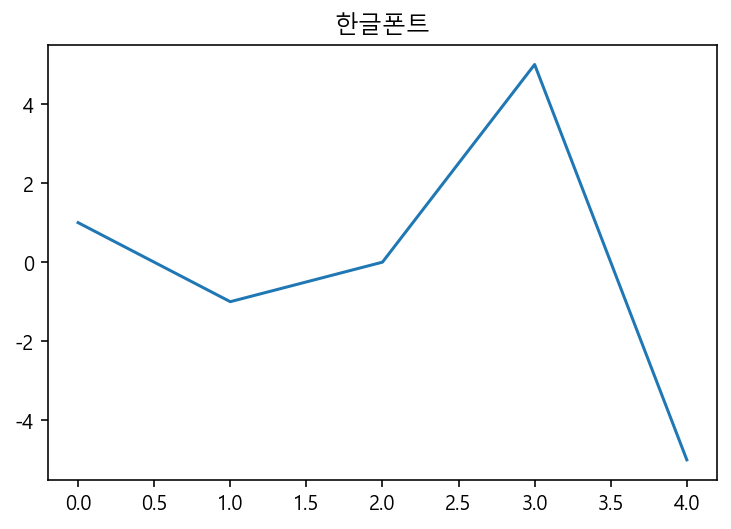

In [5]:
# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

## 데이터 로드

In [6]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df=pd.read_csv("전국도시공원정보표준데이터.csv",encoding="cp949")
df.shape

(18146, 19)

In [7]:
# 미리보기를 합니다.
df.head()


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,29200-00068,다모아,어린이공원,NaN,광주광역시 광산구 월곡동 520-1,35.170911,126.806951,2231.0,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시
1,29200-00069,햇살,어린이공원,NaN,광주광역시 광산구 월곡동 503,35.174005,126.806878,1689.4,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시
2,29200-00070,월곡하늘,어린이공원,NaN,광주광역시 광산구 월곡동 608-1,35.167242,126.810187,1815.0,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시
3,29200-00071,월곡솔밭,어린이공원,NaN,광주광역시 광산구 월곡동 575-10,35.169069,126.814292,1736.7,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시
4,29200-00072,어등,어린이공원,NaN,광주광역시 광산구 우산동 1572-4,35.164896,126.808265,5600.2,NaN,NaN,NaN,NaN,NaN,1991-12-26,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시


## Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

In [8]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling

pandas_profiling.__version__

'2.8.0'

In [9]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\82109\anaconda3\python.exe -m pip install --upgrade pip' command.


* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [10]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
from pandas_profiling import ProfileReport
import matplotlib 
matplotlib.font_manager._rebuild()

# 운영체제에 맞는 폰트를 설정해 주세요.
# Win
# plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
# 위 폰트 설정 방법으로 오류가 난다면 아래의 seaborn set을 통해 설정해 보세요.
# Win
# sns.set(font="Malgun Gothic")
# Mac
sns.set(font="AppleGothic")

%time profile = ProfileReport(df, title="도시공원 표준 데이터")
profile.to_file(output_file="05-park_pandas_profile.html")

Wall time: 28.9 ms


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_t

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from c

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matp

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\82109\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


## 기본 정보 보기

In [11]:
# info로 기본 정보를 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18146 entries, 0 to 18145
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18146 non-null  object 
 1   공원명           18146 non-null  object 
 2   공원구분          18146 non-null  object 
 3   소재지도로명주소      6476 non-null   object 
 4   소재지지번주소       17340 non-null  object 
 5   위도            17804 non-null  float64
 6   경도            17801 non-null  float64
 7   공원면적          18146 non-null  float64
 8   공원보유시설(운동시설)  4940 non-null   object 
 9   공원보유시설(유희시설)  6627 non-null   object 
 10  공원보유시설(편익시설)  5306 non-null   object 
 11  공원보유시설(교양시설)  1117 non-null   object 
 12  공원보유시설(기타시설)  2947 non-null   object 
 13  지정고시일         15544 non-null  object 
 14  관리기관명         16998 non-null  object 
 15  전화번호          16609 non-null  object 
 16  데이터기준일자       18146 non-null  object 
 17  제공기관코드        18146 non-null  object 
 18  제공기관명         18146 non-nu

In [12]:
# 결측치의 수를 구합니다.

a=df.isnull().sum()
a

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        11670
소재지지번주소           806
위도                342
경도                345
공원면적                0
공원보유시설(운동시설)    13206
공원보유시설(유희시설)    11519
공원보유시설(편익시설)    12840
공원보유시설(교양시설)    17029
공원보유시설(기타시설)    15199
지정고시일            2602
관리기관명            1148
전화번호             1537
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [13]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.

a=df.isnull().mean()
a

관리번호            0.000000
공원명             0.000000
공원구분            0.000000
소재지도로명주소        0.643117
소재지지번주소         0.044418
위도              0.018847
경도              0.019012
공원면적            0.000000
공원보유시설(운동시설)    0.727764
공원보유시설(유희시설)    0.634796
공원보유시설(편익시설)    0.707594
공원보유시설(교양시설)    0.938444
공원보유시설(기타시설)    0.837595
지정고시일           0.143392
관리기관명           0.063265
전화번호            0.084702
데이터기준일자         0.000000
제공기관코드          0.000000
제공기관명           0.000000
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from c

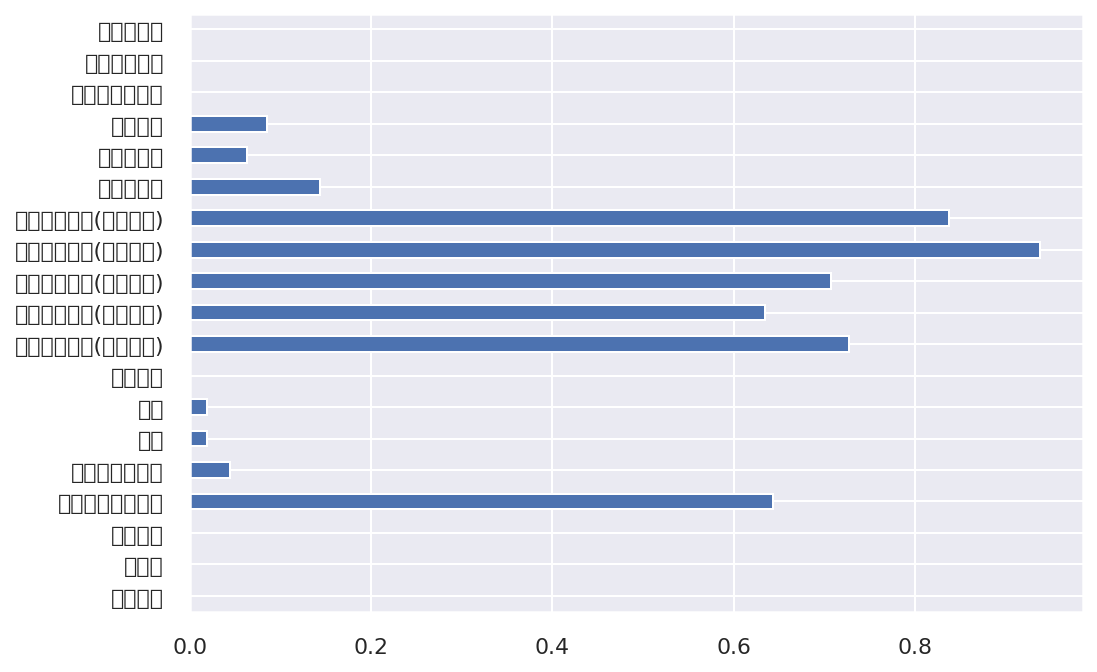

In [14]:
a.plot.barh()

<AxesSubplot:>

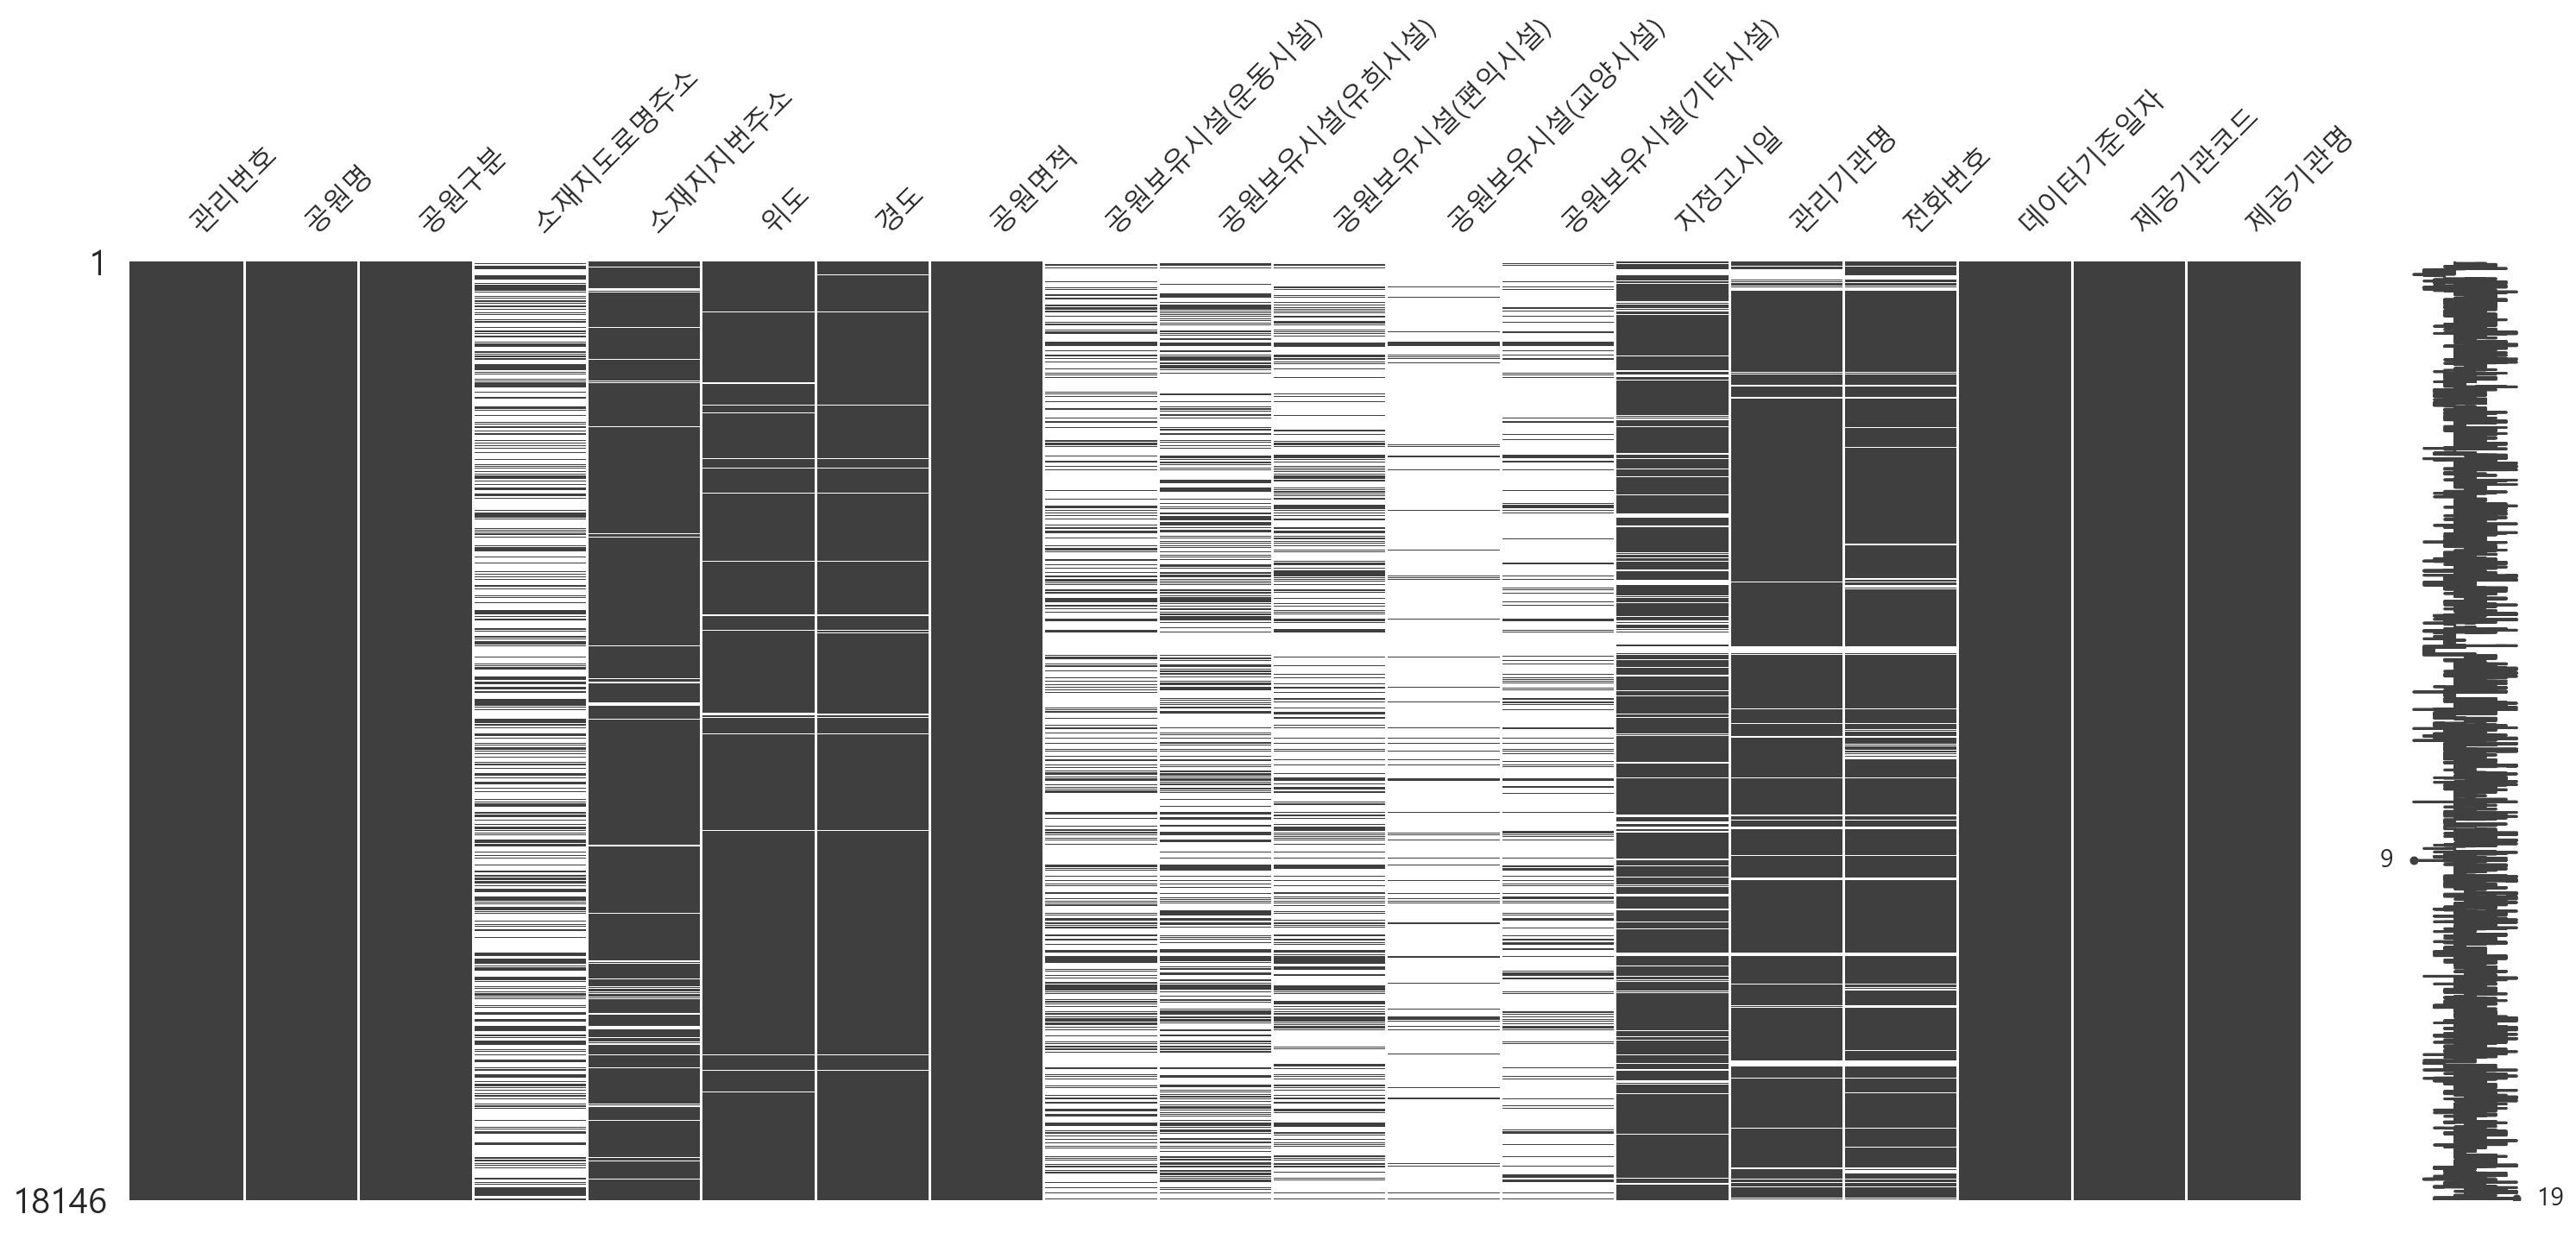

In [15]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

import missingno

missingno.matrix(df)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<AxesSubplot:>

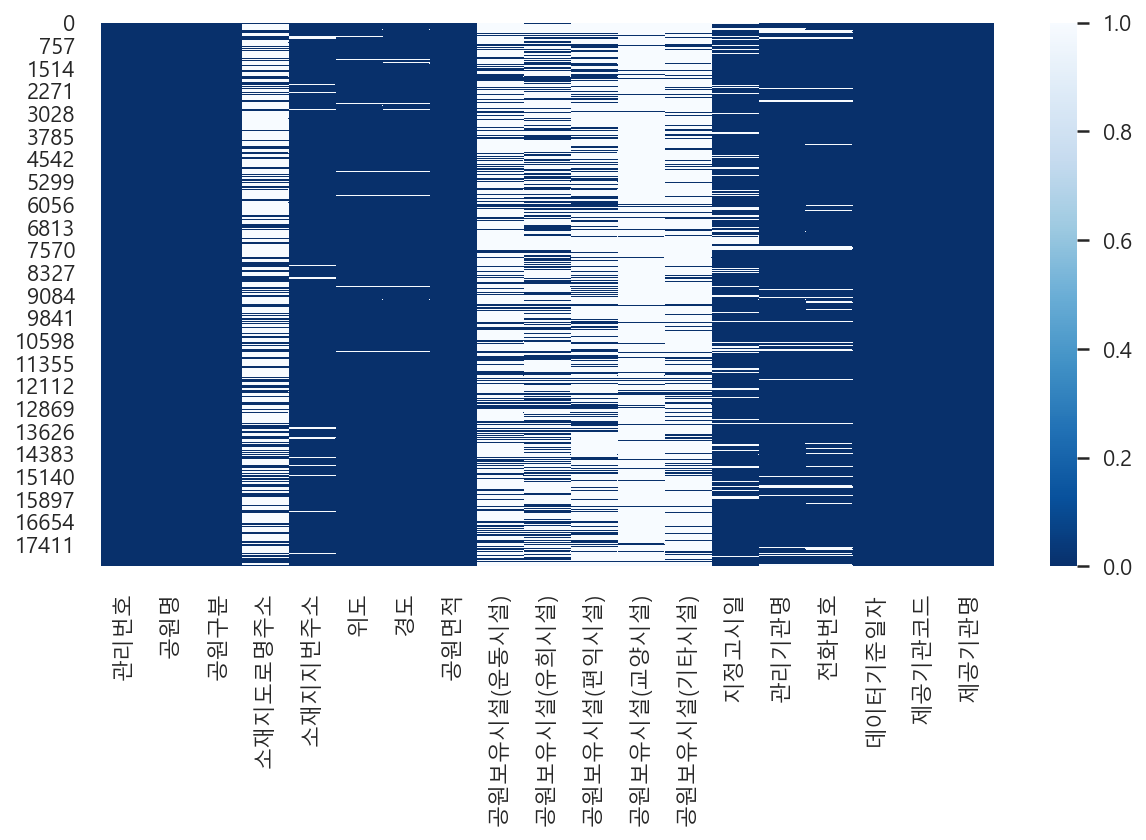

In [16]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.
null=df.isnull()

plt.figure(figsize=(10,5))
a=sns.heatmap(data=null,cmap="Blues_r")
a

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [17]:
# 전체 컬럼명을 출력해 봅니다.

df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [18]:
# 도로명 주소의 널값 수
df["소재지도로명주소"].isnull().sum()


11670

In [19]:
# 지번 주소의 널값 수

df["소재지지번주소"].isnull().sum()

806

In [20]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.
print(df.shape)
df[(df["소재지도로명주소"].notnull() & df["소재지지번주소"].notnull())].shape

(18146, 19)


(5670, 19)

In [21]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.

df["소재지도로명주소"]=df["소재지도로명주소"].fillna(df["소재지지번주소"])
df.shape

(18146, 19)

In [22]:
# "소재지도로명주소"의 결측치수를 세어봅니다.
df["소재지도로명주소"].isnull().sum()


0

In [23]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.

df[(df["소재지도로명주소"].isnull() & df["소재지지번주소"].isnull())].shape

(0, 19)

## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [24]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기

df["시도"]=df["소재지도로명주소"].str.split(' ' ,expand=True )[0] 
df[["소재지도로명주소","시도"]].head(3)

,소재지도로명주소,시도
0,광주광역시 광산구 월곡동 520-1,광주광역시
1,광주광역시 광산구 월곡동 503,광주광역시
2,광주광역시 광산구 월곡동 608-1,광주광역시


In [25]:
# 구군 가져오기
df["구군"]=df["소재지도로명주소"].str.split(' ' ,expand=True )[1] 
df[["소재지도로명주소","시도","구군"]].head(3)



,소재지도로명주소,시도,구군
0,광주광역시 광산구 월곡동 520-1,광주광역시,광산구
1,광주광역시 광산구 월곡동 503,광주광역시,광산구
2,광주광역시 광산구 월곡동 608-1,광주광역시,광산구


In [26]:
# 시도 데이터의 빈도수 세어보기
df["시도"].value_counts()


경기도        3914
서울특별시      1871
전라남도       1589
충청남도       1297
경상남도       1162
전라북도       1117
경상북도        949
충청북도        866
광주광역시       856
울산광역시       815
인천광역시       728
부산광역시       670
강원도         652
대구광역시       612
대전광역시       498
제주특별자치도     245
-           234
세종특별자치시      70
경남            1
Name: 시도, dtype: int64

In [27]:
# 강원은 "강원도"로 변경해줄 필요가 보입니다.

df["시도"]=df["시도"].replace("경남","경상남도")
df["시도"].value_counts()

경기도        3914
서울특별시      1871
전라남도       1589
충청남도       1297
경상남도       1163
전라북도       1117
경상북도        949
충청북도        866
광주광역시       856
울산광역시       815
인천광역시       728
부산광역시       670
강원도         652
대구광역시       612
대전광역시       498
제주특별자치도     245
-           234
세종특별자치시      70
Name: 시도, dtype: int64

In [28]:
df=df.drop((df[df["시도"]=="-"].index))
df["시도"].value_counts()

경기도        3914
서울특별시      1871
전라남도       1589
충청남도       1297
경상남도       1163
전라북도       1117
경상북도        949
충청북도        866
광주광역시       856
울산광역시       815
인천광역시       728
부산광역시       670
강원도         652
대구광역시       612
대전광역시       498
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

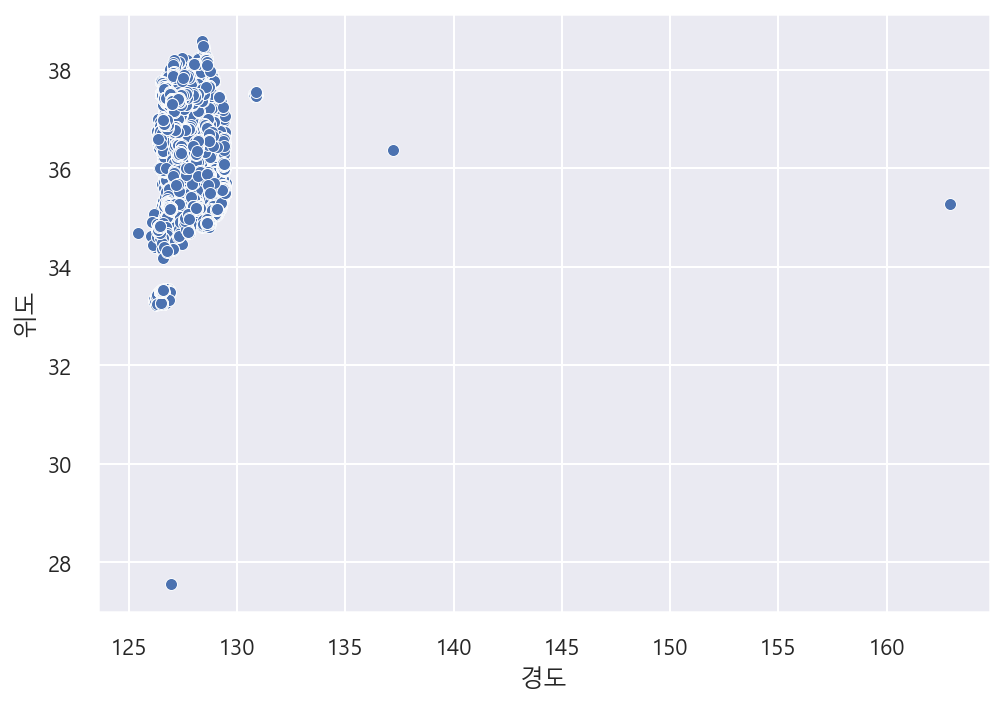

In [29]:
# 위경도 시각화
sns.scatterplot(data=df,x="경도",y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

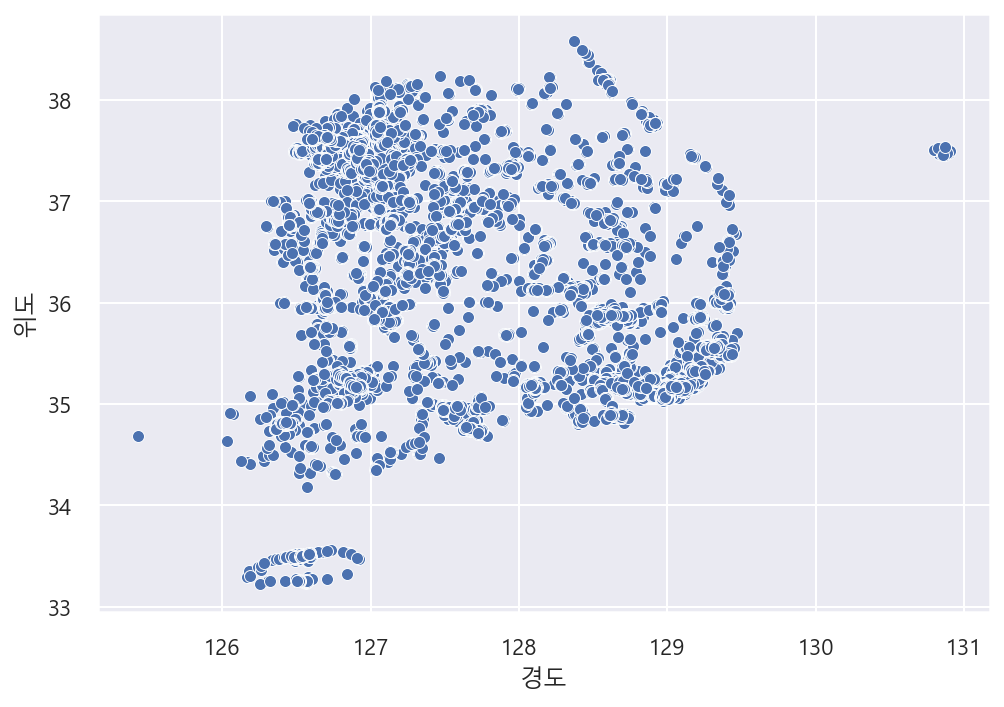

In [30]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.

df_park=df[(df["경도"]<135) & (df["위도"]>32)].copy()
sns.scatterplot(data=df_park,x="경도",y="위도")


In [31]:
df_park.describe()

,위도,경도,공원면적
count,17481.000000,17481.000000,1.748100e+04
mean,36.401577,127.489620,3.524830e+04
std,1.059027,0.854870,2.129704e+05
min,33.218670,125.432215,0.000000e+00
25%,35.348859,126.882244,1.506800e+03
50%,36.516270,127.113421,2.225000e+03
75%,37.422789,128.073975,1.030900e+04
max,38.586685,130.905955,8.703000e+06


In [32]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.
df[(df["경도"] > 135) | (df["위도"] < 32)]


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
431,46710-00112,공원-112,소공원,전라남도 담양군 대전면 성산리 434-13,전라남도 담양군 대전면 성산리 434-13,35.269633,162.920004,743.0,NaN,NaN,...,NaN,NaN,2007-11-27,담양군청,061-380-3118,2020-12-14,4850000,전라남도 담양군,전라남도,담양군
3296,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2020-07-16,5710000,충청북도 청주시,충청북도,청주시
10402,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2020-05-14,3130000,서울특별시 마포구,서울특별시,마포구


## 날짜 데이터 다루기

In [33]:
# 지정고시일의 데이터 타입을 봅니다.

df["지정고시일"]

0        1990-06-30
1        1990-06-30
2        1990-06-30
3        1990-06-30
4        1991-12-26
            ...    
18141    2018-12-28
18142    2018-12-28
18143    2018-12-28
18144    2018-12-28
18145    2018-12-28
Name: 지정고시일, Length: 17912, dtype: object

In [34]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.
df["지정고시일"]=pd.to_datetime(df["지정고시일"]).copy()
df["지정고시일"]

0       1990-06-30
1       1990-06-30
2       1990-06-30
3       1990-06-30
4       1991-12-26
           ...    
18141   2018-12-28
18142   2018-12-28
18143   2018-12-28
18144   2018-12-28
18145   2018-12-28
Name: 지정고시일, Length: 17912, dtype: datetime64[ns]

In [35]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.

df["고시연도"]=df["지정고시일"].dt.year
df["고시월"]=df["지정고시일"].dt.month

df[["고시연도","고시월"]]

,고시연도,고시월
0,1990.0,6.0
1,1990.0,6.0
2,1990.0,6.0
3,1990.0,6.0
4,1991.0,12.0
...,...,...
18141,2018.0,12.0
18142,2018.0,12.0
18143,2018.0,12.0
18144,2018.0,12.0


In [36]:
# 화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.
df.loc[df["공원명"].str.contains("화랑"),["공원명","고시연도"]]

,공원명,고시연도
661,화랑,1991.0
1080,화랑공원,2010.0
1562,판교제8호(화랑)공원,2004.0
3224,화랑공원,1972.0
5688,화랑공원,1969.0
10680,화랑공원,1980.0
14323,화랑,2004.0


C:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

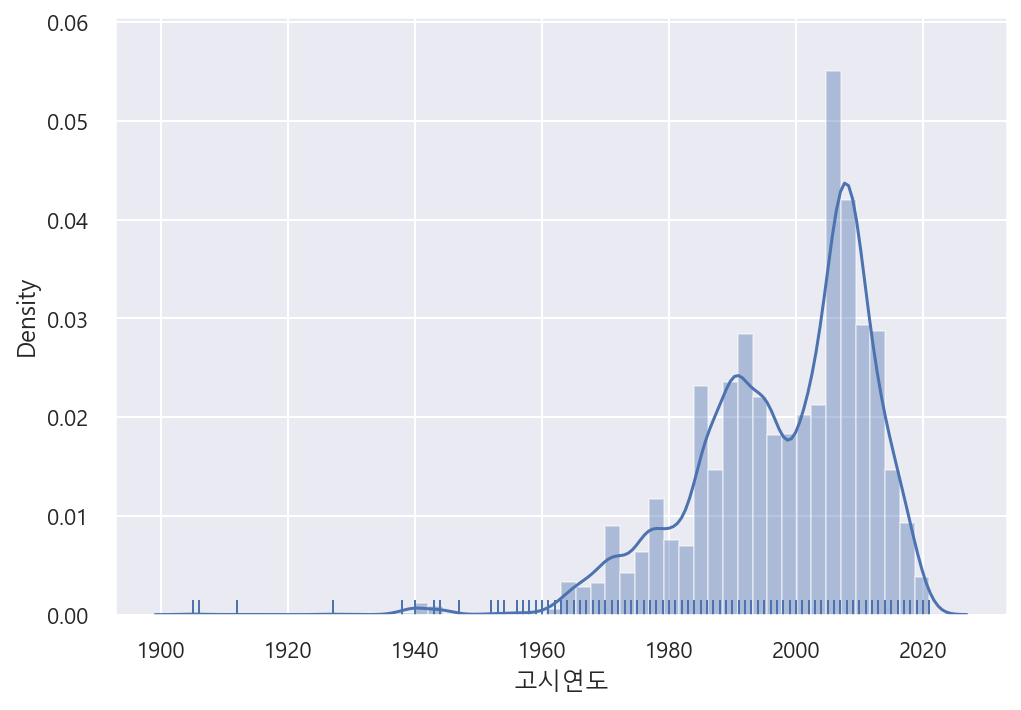

In [37]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.
sns.distplot(df.loc[df["고시연도"].notnull(),"고시연도"],rug=True)


* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [38]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.
# 데이터가 많기 때문에 2000년보다 크고 2019년보다 작은 연도의 데이터만 봅니다.

year_month=pd.pivot_table(data=df,index="고시연도",columns="고시월",values="공원명",aggfunc="count")
year_month=year_month[(year_month.index>2000) & (year_month.index<2019)]
year_month.astype(int).style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,43,39,7,68,11,14,8,18,35,37,40,50
2002.0,31,19,18,13,32,18,45,21,6,40,47,58
2003.0,38,15,15,18,13,34,26,7,7,16,56,52
2004.0,62,27,17,22,12,19,6,73,11,29,57,123
2005.0,70,28,11,21,41,34,19,32,17,39,52,101
2006.0,81,30,32,30,56,47,28,36,26,53,121,114
2007.0,63,12,10,44,16,58,67,74,76,145,176,96
2008.0,109,44,73,43,28,102,16,50,37,29,13,137
2009.0,63,31,109,72,71,60,38,40,115,23,60,130


## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [39]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다.
import re

### 공원 보유시설

In [40]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다. 
# options.display 를 사용해 max_columns 값을 채워줍니다.

pd.options.display.max_columns=100

In [41]:
# 데이터를 미리보기 합니다.
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,29200-00068,다모아,어린이공원,광주광역시 광산구 월곡동 520-1,광주광역시 광산구 월곡동 520-1,35.170911,126.806951,2231.0,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시,광주광역시,광산구,1990.0,6.0
1,29200-00069,햇살,어린이공원,광주광역시 광산구 월곡동 503,광주광역시 광산구 월곡동 503,35.174005,126.806878,1689.4,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시,광주광역시,광산구,1990.0,6.0
2,29200-00070,월곡하늘,어린이공원,광주광역시 광산구 월곡동 608-1,광주광역시 광산구 월곡동 608-1,35.167242,126.810187,1815.0,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시,광주광역시,광산구,1990.0,6.0
3,29200-00071,월곡솔밭,어린이공원,광주광역시 광산구 월곡동 575-10,광주광역시 광산구 월곡동 575-10,35.169069,126.814292,1736.7,NaN,NaN,NaN,NaN,NaN,1990-06-30,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시,광주광역시,광산구,1990.0,6.0
4,29200-00072,어등,어린이공원,광주광역시 광산구 우산동 1572-4,광주광역시 광산구 우산동 1572-4,35.164896,126.808265,5600.2,NaN,NaN,NaN,NaN,NaN,1991-12-26,광주광역시 광산구,062-960-8712,2020-07-08,6290000,광주광역시,광주광역시,광산구,1991.0,12.0


### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [42]:
df["공원보유시설(운동시설)"].value_counts()

운동기구               256
체력단련시설             254
농구장                235
야외운동기구             166
배드민턴장              150
                  ... 
축구장,풋살장,족구장,농구장      1
체육시설물15              1
농구대외 5종              1
풋살결기장, 체력단련시설        1
에어워킹 외4종             1
Name: 공원보유시설(운동시설), Length: 1776, dtype: int64

In [43]:
gym=df["공원보유시설(운동시설)"].unique().tolist()
gym=str(gym)
gym[:10000]

"[nan, '농구대 2개', '마라톤,역기올리기,옆파도타기,온몸근육풀기,온몸역기내리기,온몸허리돌리기,윗몸일으켜기,자유철봉,하늘걷기', '배드민턴지주대,벤치프레스,어깨근육풀기,옆파도타기,온몸허리돌리기,윗몸일으키기,평행봉,하늘걷기', '어깨근육풀기,역기올리기,온몸허리돌리기,하늘걷기,허리펴기', '마라톤운동기,어깨근육풀기,옆파도타기,온몸역기내리기,온몸역기올리기,온몸허리돌리기,윗몸일으키기,평행봉,하늘걷기', '옆타도타기,온몸허리돌리기,하늘걷기', '옆파도타기,온몸허리돌리기,윗몸일으키기,전신달리기,전신올리기,하늘걷기', '농구대', '옆파도타기,온몸역기올리기,온몸허리돌리기,하늘걷기', '옆파도타기,온몸근육풀기,하늘걷기', '다리뻗치기,마라톤운동기,옆파도타기,온몸근육풀기,온몸노젓기,평행봉,하늘걷기', '양팔줄당기기,어깨근육풀기,옆파도타기,온몸허리돌리기,윗몸일으키기,하늘걷기', '다리뻗치기,등허리지압기,옆파도타기,온몸근육풀기,온몸역기내리기,온몸허리돌리기', '마라톤운동기,온몸역기내리기,하늘걷기', '다리뻗치기,다목적 운동장,등허리지압기,마라톤운동기,하늘걷기', '옆파도타기,윗몸일으키기,하늘걷기', '손잡이 평행대,온몸역기내리기,온몸허리돌리기,철봉,하늘걷기', '마라톤운동기,배드민턴장,배드민턴지주대,옆파도타기,온몸근육풀기,온몸역기올리기,온몸허리돌리기,윗몸일으키기,하늘걷기', '온몸역기내리기,온몸허리돌리기,하늘걷기', '온몸허리돌리기,철봉,평행봉', '어깨근육풀기,옆파도타기,온몸노젓기,온몸역기올리기,온몸허리돌리기,윗몸일으키기,족구대,족구장,하늘걷기', '벤치프레스,어깨근육풀기,옆파도타기,오금펴기,온몸허리돌리기,윗몸일으키기,하늘걷기', '족구장', '농구장', '축구장, 농구장, 베드민턴장 등', '3단 다리걸치기,3단 철봉,배드민턴 네트대,배드민턴장,온몸허리돌리기,윗몸일으키기,평행봉', '농구대,어깨근육풀기,옆파도타기,온몸근육풀기,온몸허리돌리기,윗몸일으키기,족구대,족구장', '게이트볼장,다목적 운동장,등허리지압기,발바닥지압걷기 ,어깨근육풀기,온몸노젓기,온몸역기내리기,온몸허리

In [44]:
gym=gym.replace("+",",").replace("'",",").replace(" ",",").replace("/",",")

In [45]:
gym=re.sub("[\[\]\d\-nan\.\"]","",gym)
gym=re.sub(",{2,}",",",gym)
gym

',농구대,개,마라톤,역기올리기,옆파도타기,온몸근육풀기,온몸역기내리기,온몸허리돌리기,윗몸일으켜기,자유철봉,하늘걷기,배드민턴지주대,벤치프레스,어깨근육풀기,옆파도타기,온몸허리돌리기,윗몸일으키기,평행봉,하늘걷기,어깨근육풀기,역기올리기,온몸허리돌리기,하늘걷기,허리펴기,마라톤운동기,어깨근육풀기,옆파도타기,온몸역기내리기,온몸역기올리기,온몸허리돌리기,윗몸일으키기,평행봉,하늘걷기,옆타도타기,온몸허리돌리기,하늘걷기,옆파도타기,온몸허리돌리기,윗몸일으키기,전신달리기,전신올리기,하늘걷기,농구대,옆파도타기,온몸역기올리기,온몸허리돌리기,하늘걷기,옆파도타기,온몸근육풀기,하늘걷기,다리뻗치기,마라톤운동기,옆파도타기,온몸근육풀기,온몸노젓기,평행봉,하늘걷기,양팔줄당기기,어깨근육풀기,옆파도타기,온몸허리돌리기,윗몸일으키기,하늘걷기,다리뻗치기,등허리지압기,옆파도타기,온몸근육풀기,온몸역기내리기,온몸허리돌리기,마라톤운동기,온몸역기내리기,하늘걷기,다리뻗치기,다목적,운동장,등허리지압기,마라톤운동기,하늘걷기,옆파도타기,윗몸일으키기,하늘걷기,손잡이,평행대,온몸역기내리기,온몸허리돌리기,철봉,하늘걷기,마라톤운동기,배드민턴장,배드민턴지주대,옆파도타기,온몸근육풀기,온몸역기올리기,온몸허리돌리기,윗몸일으키기,하늘걷기,온몸역기내리기,온몸허리돌리기,하늘걷기,온몸허리돌리기,철봉,평행봉,어깨근육풀기,옆파도타기,온몸노젓기,온몸역기올리기,온몸허리돌리기,윗몸일으키기,족구대,족구장,하늘걷기,벤치프레스,어깨근육풀기,옆파도타기,오금펴기,온몸허리돌리기,윗몸일으키기,하늘걷기,족구장,농구장,축구장,농구장,베드민턴장,등,단,다리걸치기,단,철봉,배드민턴,네트대,배드민턴장,온몸허리돌리기,윗몸일으키기,평행봉,농구대,어깨근육풀기,옆파도타기,온몸근육풀기,온몸허리돌리기,윗몸일으키기,족구대,족구장,게이트볼장,다목적,운동장,등허리지압기,발바닥지압걷기,어깨근육풀기,온몸노젓기,온몸역기내리기,온몸허리돌리기,하늘걷기,다리뻗치기,등허리？히기,등허리지압기,마라톤운동기,양팔줄당기기,어깨근육풀기,온몸노젓기,온몸역기내리기,온몸허리돌리기,윗몸일으키기,하늘걷기,농구대(이동식),

In [46]:
pd.Series(gym.split(",")).value_counts()


배드민턴장        256
농구장          240
하늘걷기         203
운동기구         186
게이트볼장        163
            ... 
트위스트외          1
크로스컨트리외종       1
매달려온몸회전하기      1
족구장배드민턴장       1
몸체말아올리기        1
Length: 795, dtype: int64

In [47]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에 
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.

gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장    256
농구장      240
하늘걷기     203
운동기구     186
게이트볼장    163
dtype: int64

<AxesSubplot:>

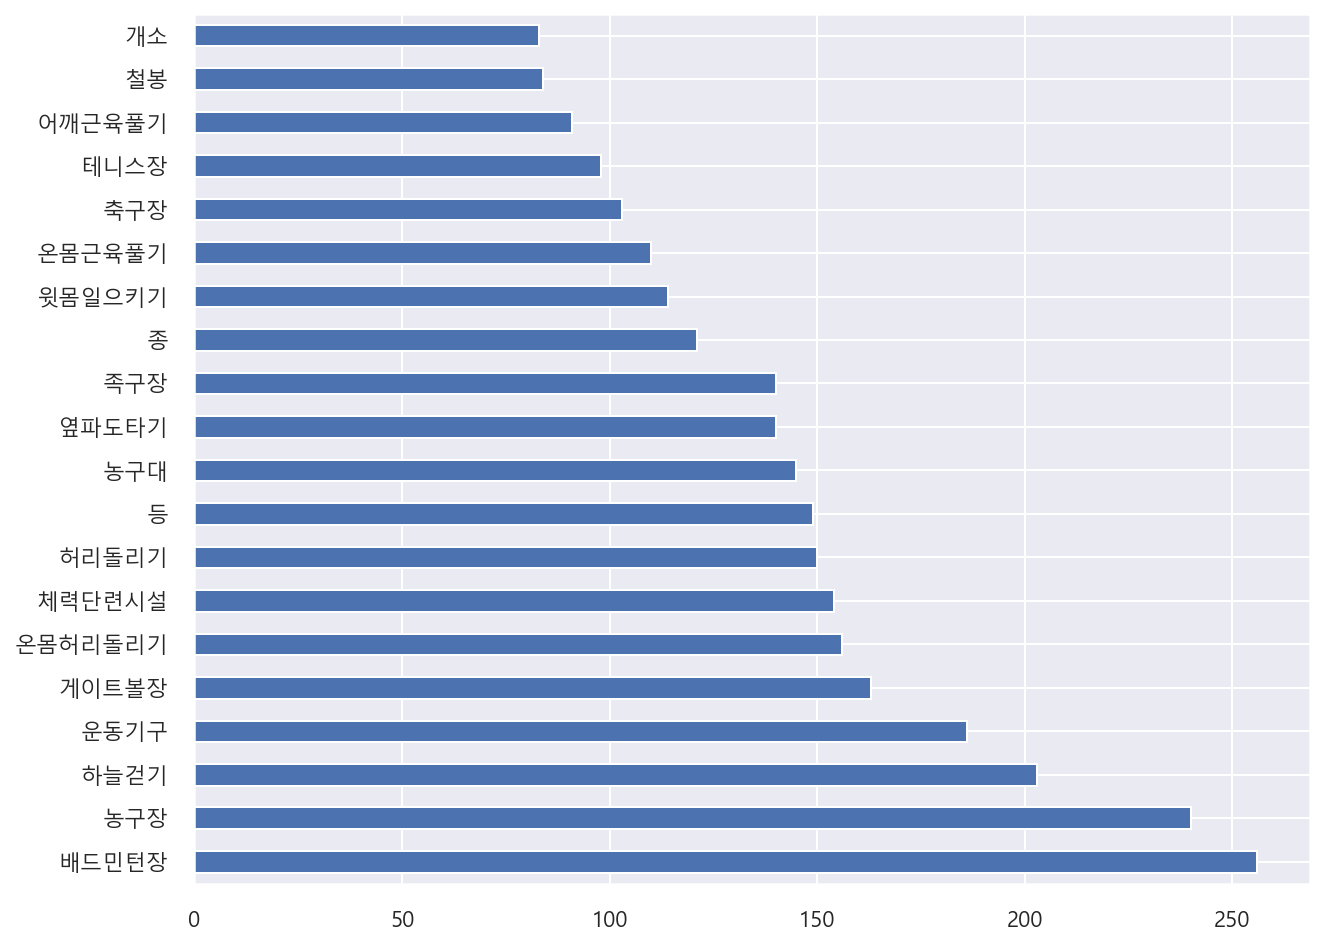

In [48]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.

gym_count.head(20).plot.barh(rot=0,figsize=(10,8))


### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [49]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"C:\Windows\Fonts\malgun.ttf" ,
        width=width, height=height,
        stopwords=["운동기구", "개소", "외종"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()


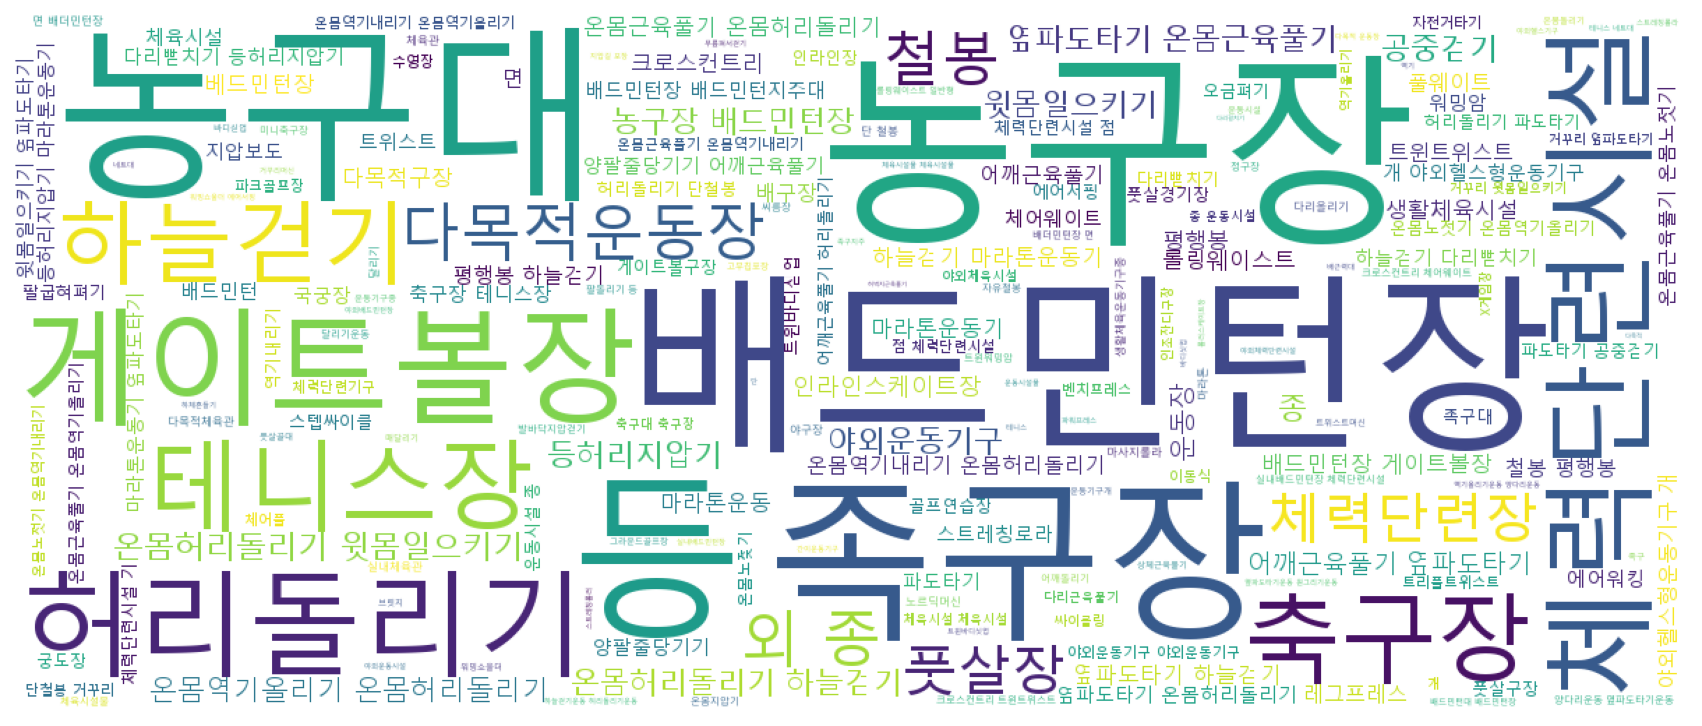

In [50]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.

wordcloud(gym, width=1200, height=500)

### 편익시설

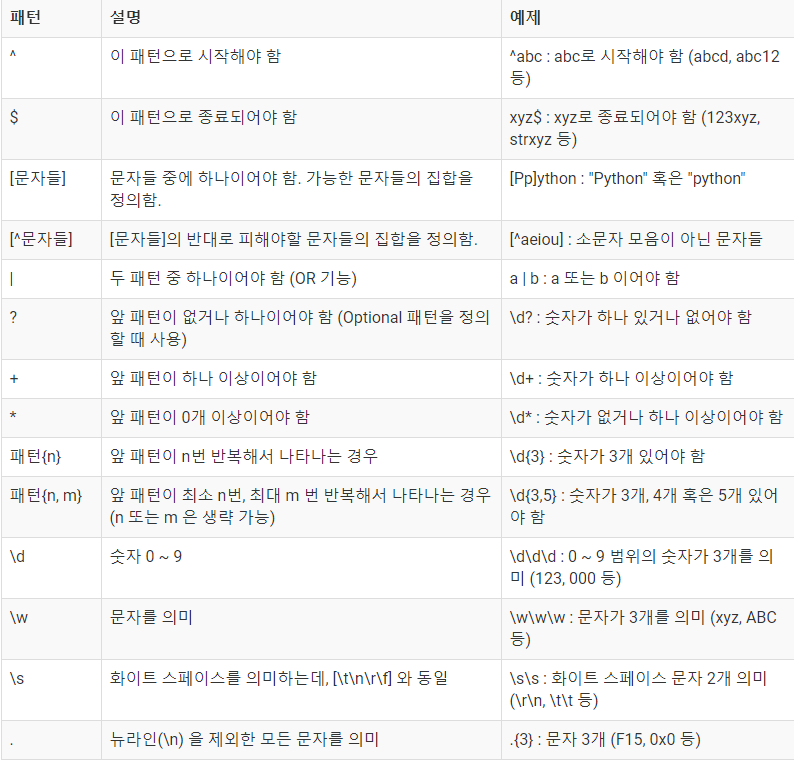

In [51]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.

def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    return text

In [52]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.
get_string("[1. '화장실' 5, 2 주차장, -, nan, /]")

'화장실,주차장,'

In [53]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요.
get_string(np.nan)

nan

In [54]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.
df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head(50)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46    화장실동
47    화장실동
48    화장실동
49    화장실동
Name: 편익시설, dtype: object

In [55]:
# 전처리 한 "편익시설"의 빈도수를 구하고 
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.

df["편익시설"].value_counts()

화장실                  979
                     190
파고라                  181
정자,벤치                167
주차장,화장실              145
                    ... 
화장실,안내소,휴게음식점,휴게소      1
정자,주차장,벤치,화장실          1
등의자,평의자,평상             1
주차장개소                  1
파고라,음수대,육각등의자세트        1
Name: 편익시설, Length: 926, dtype: int64

In [56]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.

fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실동,화장실동,화장실동,화장실동,음수전,음수대,음수전,음수대,자전거보관대,음수전,음수대,음수전,자전거거치대,음수대,자전거보관대,음수전,자전거보관대,음수전,화장실,화장실,주차장,'

In [57]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac = str(df["편익시설"].tolist())
fac = get_string(fac)
fac[:100]

',화장실동,화장실동,화장실동,화장실동,음수전,음수대,음수전,음수대,자전거보관대,음수전,음수대,음수전,자전거거치대,음수대,자전거보관대,음수전,자전거보관대,음수전,화장실,화장실,주차장'

In [58]:
# ,가 2개 이상 들어가면 하나로 변경합니다.
# '화장실,주차장,,,' 텍스트를 정규표현식으로 바꿔봅니다.

re.sub(",{2,}", ",", '화장실,주차장,,,')

'화장실,주차장,'

In [59]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.

fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1892
파고라     971
정자      565
벤치      558
주차장     456
dtype: int64

<AxesSubplot:>

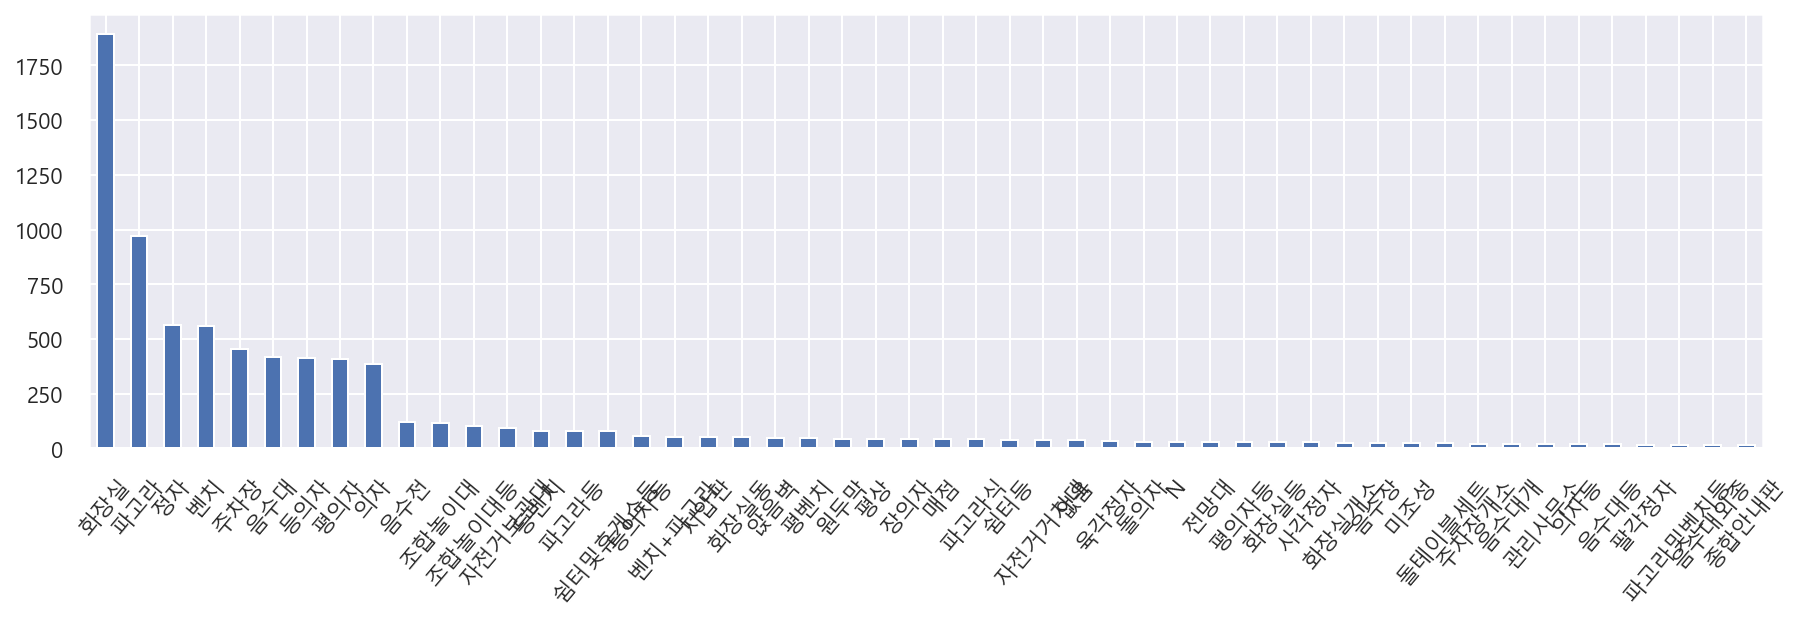

In [60]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.

fac_count.head(50).plot.bar(figsize=(15, 4),rot=50)

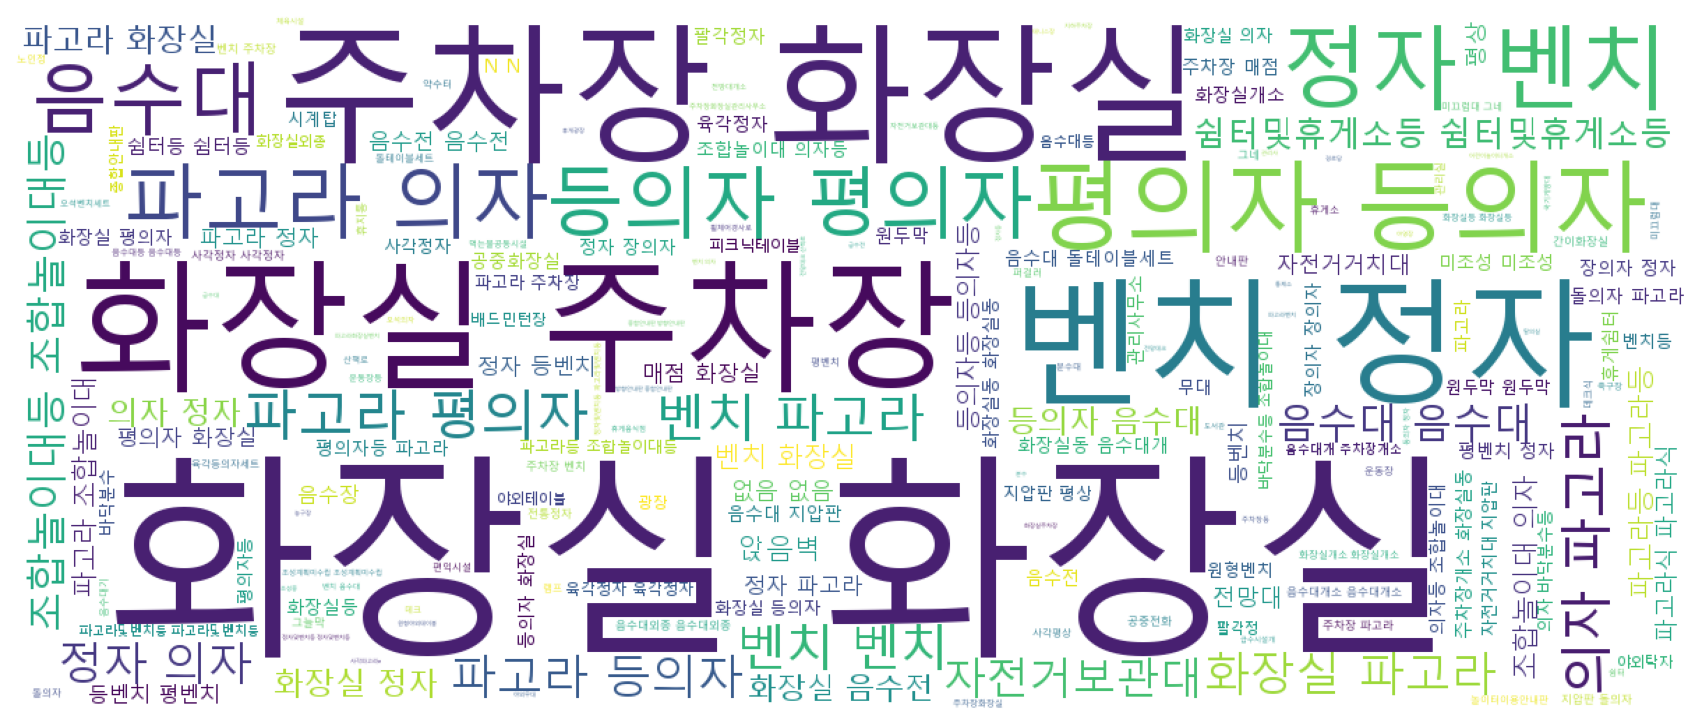

In [61]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.

wordcloud(fac, width=1200, height=500)

### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [62]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.

facilities = ["화장실", "주차장", "음수대", "파고라", "정자", "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [63]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.

for i in facilities:
    df[i]=df_fac["공원보유시설(편익시설)"].str.contains(i)

In [64]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다. 

df[facilities].sum()

화장실     2133
주차장      555
음수대      521
파고라     1242
정자       678
벤치       804
의자      1126
놀이터       11
축구장        6
야영장        3
CCTV       2
dtype: object

## 특정 정보 마스킹
### 전화번호 마스킹

In [65]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-1234-5678")



'010-12**-**78'

In [66]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-123-5678")

'010-1**-**78'

In [67]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})",r"\1-\2**-**\5","010-12-5678")

'010-12-5678'

In [68]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")


'+82-10-1234-5678'

In [69]:
phone="+82-10-1234-5678"

def mask_phone_number(phone):
    if pd.isnull(phone):
        return phone
    a= phone.split('-')
    b=len(a)//2
    a[b]=re.sub("(\d{1,2})(\d{2,})",r"\1**",a[b]) #3개 2번째,, 4개 3번째
    a[-1]=re.sub("(\d{2,})(\d{2,})",r"**\2",a[-1])
    phone='-'.join(a)
    return phone 

mask_phone_number(phone)

'+82-10-12**-**78'

In [70]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.

mask_phone_number(np.nan)

nan

In [71]:
df["전화번호(전처리)"]=df["전화번호"].map(mask_phone_number)
df["전화번호(전처리)"].value_counts

<bound method IndexOpsMixin.value_counts of 0        062-9**-**12
1        062-9**-**12
2        062-9**-**12
3        062-9**-**12
4        062-9**-**12
             ...     
18141             NaN
18142             NaN
18143             NaN
18144             NaN
18145             NaN
Name: 전화번호(전처리), Length: 17912, dtype: object>

In [72]:
df[["공원명","전화번호","전화번호(전처리)"]]

,공원명,전화번호,전화번호(전처리)
0,다모아,062-960-8712,062-9**-**12
1,햇살,062-960-8712,062-9**-**12
2,월곡하늘,062-960-8712,062-9**-**12
3,월곡솔밭,062-960-8712,062-9**-**12
4,어등,062-960-8712,062-9**-**12
...,...,...,...
18141,공원:826(통정리지구),NaN,NaN
18142,공원:827(통정리지구),NaN,NaN
18143,공원:828(통정리지구),NaN,NaN
18144,공원:829(통정리지구),NaN,NaN


### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [73]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"

re.sub("[^\@.]","x",email)

'xxxxxxx@xxxx.xxx'

In [74]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"
a,b=email.split("@")
mask=re.sub("\w","*",a[1:-1])
print(f"{a[0]}{mask}{a[-1]}@{b}")
print(email)

a*****s@mail.com
address@mail.com


In [75]:
# 위에서 작성한 예제를 함수로 만듭니다.
email = "swjs2sh@mail.com"

def mask_email(email):
    if pd.isna(email):
        return email
    a,b=email.split("@")
    mask=re.sub("\w","*",a)
    return print(f"{a[0]}{mask}@{b}")

mask_email(email)
          

s*******@mail.com


# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [76]:
# data_types 변수에 데이터 타입만 따로 모으기

data_types=df.dtypes
data_types

관리번호                    object
공원명                     object
공원구분                    object
소재지도로명주소                object
소재지지번주소                 object
위도                     float64
경도                     float64
공원면적                   float64
공원보유시설(운동시설)            object
공원보유시설(유희시설)            object
공원보유시설(편익시설)            object
공원보유시설(교양시설)            object
공원보유시설(기타시설)            object
지정고시일           datetime64[ns]
관리기관명                   object
전화번호                    object
데이터기준일자                 object
제공기관코드                  object
제공기관명                   object
시도                      object
구군                      object
고시연도                   float64
고시월                    float64
편익시설                    object
화장실                     object
주차장                     object
음수대                     object
파고라                     object
정자                      object
벤치                      object
의자                      object
놀이터                     object
축구장     

## 수치형 변수 요약

In [77]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.

var_numbers=data_types[df.dtypes =="float64"]
var_numbers=var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '고시연도', '고시월']

array([[<AxesSubplot:title={'center':'위도'}>,
        <AxesSubplot:title={'center':'경도'}>],
       [<AxesSubplot:title={'center':'공원면적'}>,
        <AxesSubplot:title={'center':'지정고시일'}>],
       [<AxesSubplot:title={'center':'고시연도'}>,
        <AxesSubplot:title={'center':'고시월'}>]], dtype=object)

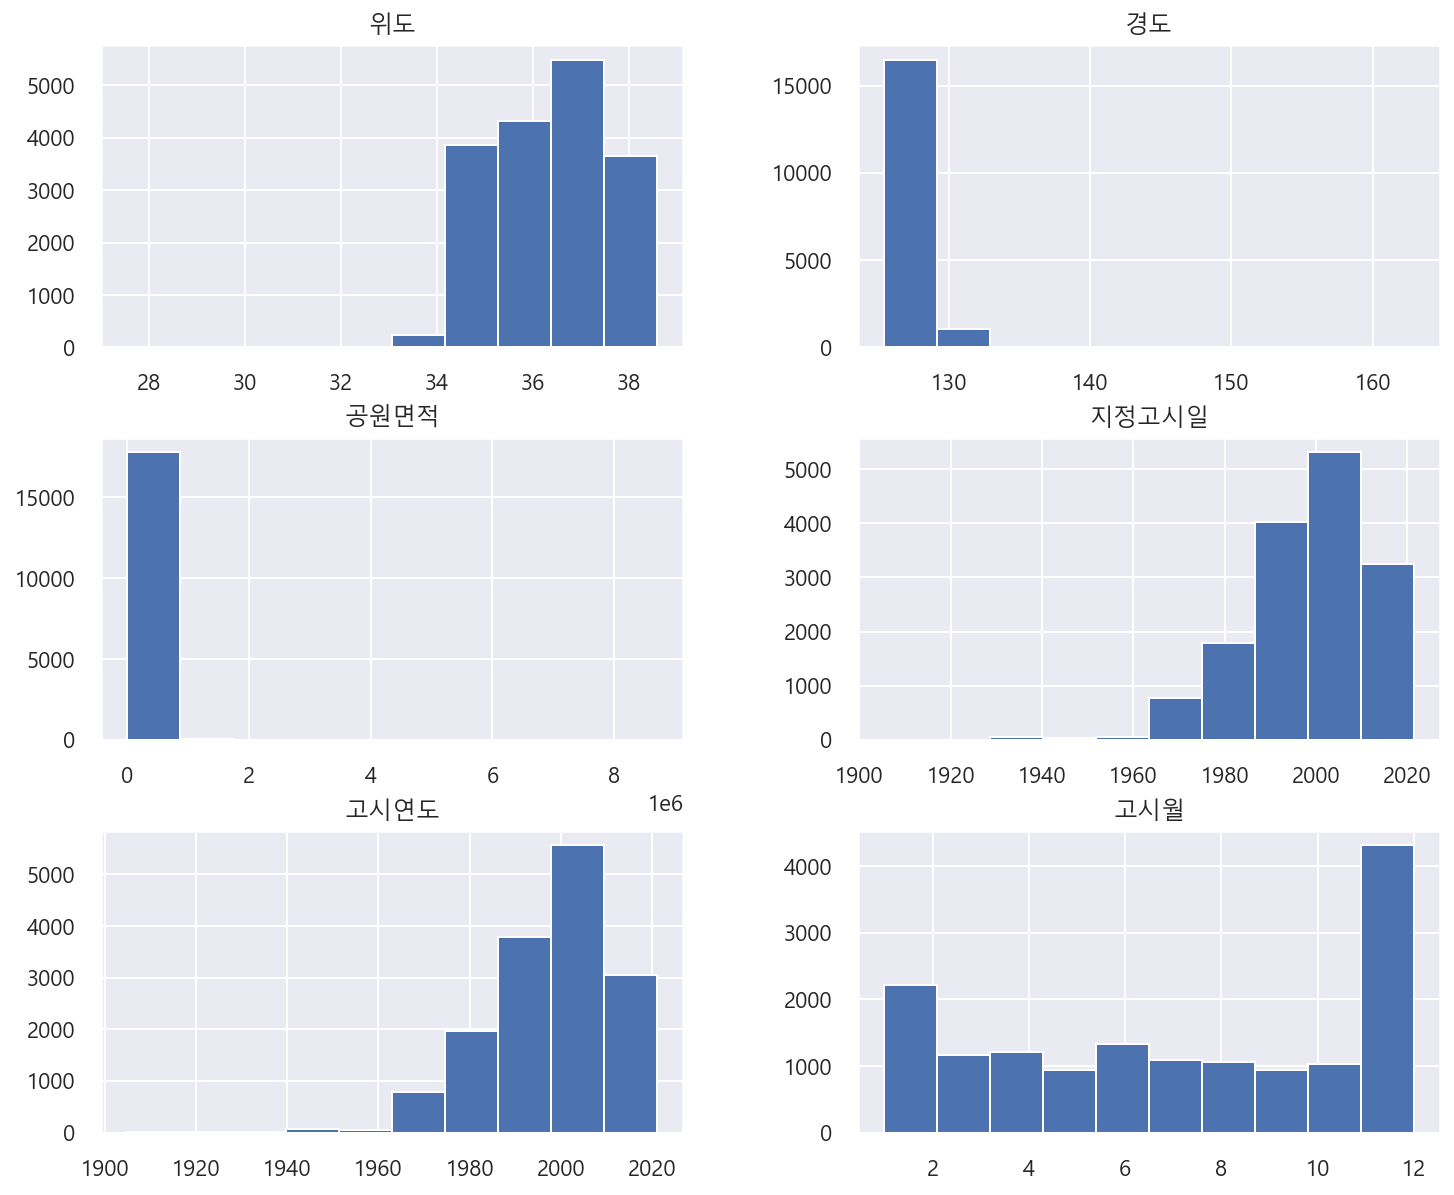

In [78]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.

h=df.hist(figsize=(12,10))
h

In [79]:
# describe 를 통해 요약합니다.

df.describe()

,위도,경도,공원면적,고시연도,고시월
count,17570.000000,17567.000000,1.791200e+04,15312.000000,15312.000000
mean,36.401585,127.492932,3.540278e+04,1998.083921,7.126176
std,1.060796,0.898663,2.129209e+05,13.572557,3.725688
min,27.551606,125.432215,0.000000e+00,1905.000000,1.000000
25%,35.353749,126.883316,1.505600e+03,1990.000000,4.000000
50%,36.516925,127.113644,2.220000e+03,2001.000000,7.000000
75%,37.424840,128.080315,1.031200e+04,2009.000000,11.000000
max,38.586685,162.920004,8.703000e+06,2021.000000,12.000000


## 범주형 변수 요약

In [80]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.

var_objects=df.dtypes[df.dtypes == "object"].index.tolist()
var_objects

['관리번호',
 '공원명',
 '공원구분',
 '소재지도로명주소',
 '소재지지번주소',
 '공원보유시설(운동시설)',
 '공원보유시설(유희시설)',
 '공원보유시설(편익시설)',
 '공원보유시설(교양시설)',
 '공원보유시설(기타시설)',
 '관리기관명',
 '전화번호',
 '데이터기준일자',
 '제공기관코드',
 '제공기관명',
 '시도',
 '구군',
 '편익시설',
 '화장실',
 '주차장',
 '음수대',
 '파고라',
 '정자',
 '벤치',
 '의자',
 '놀이터',
 '축구장',
 '야영장',
 'CCTV',
 '전화번호(전처리)']

In [81]:
# 문자열 타입의 데이터 describe 로 요약하기
df.describe(include="object")

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,17912,17912,17912,17912,17106,4874,6538,5251,1074,2883,16764,16376,17912,17912,17912,17912,17912,5251,5251,5251,5251,5251,5251,5251,5251,5251,5251,5251,5251,16376
unique,15503,13290,15,16110,15478,1776,1383,1322,378,1048,322,518,163,237,237,17,254,926,2,2,2,2,2,2,2,2,2,2,2,494
top,31110-60001,공원,어린이공원,전라북도 전주시 덕진구 송천동 2가 377-66,전라북도 전주시 덕진구 송천동 2가 377-66,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,061-749-6330,2020-07-16,5670000,경상남도 창원시,경기도,북구,화장실,False,False,False,False,False,False,False,False,False,False,False,061-7**-**30
freq,124,150,9659,7,7,256,1410,926,240,121,500,344,596,500,500,3914,512,979,3118,4696,4730,4009,4573,4447,4125,5240,5245,5248,5249,344


## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [82]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.
df[["관리기관명","공원구분"]]
manage_category=pd.crosstab(index=df["관리기관명"],columns=df["공원구분"])
manage_category=manage_category[manage_category["체육공원"]>=5]
manage_category.style.background_gradient(cmap="Blues")

공원구분,가로공원,근린공원,기타,기타공원,도시농업공원,도시자연공원,도시자연공원구역,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,주제공원,체육공원
관리기관명,,,,,,,,,,,,,,,
경기도 고양시 푸른도시사업소,0,86,0,0,0,0,0,0,7,1,7,0,0,0,6
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,0,33,0,0,0,0,0,2,5,25,4,68,4,0,6
경기도 시흥시청,0,37,0,0,1,0,0,0,7,6,3,72,0,0,6
경기도 화성시청 공원관리과,0,62,0,0,0,0,0,0,0,45,3,104,1,0,5
경상남도 창원시청,0,90,0,0,0,0,0,4,3,41,0,352,0,0,10
대전광역시 대덕구청,0,11,2,0,0,0,0,0,3,10,0,49,1,0,6
성남시 공원과,0,52,0,0,0,0,0,1,0,0,0,0,2,0,6
평택시청(공원과),0,118,0,0,1,0,0,1,8,58,31,213,3,0,7


In [83]:
# "시도" 별 "공원구분" 의 수를 구합니다.
k=pd.crosstab(index=df["시도"],columns=df["공원구분"])
k.style.background_gradient()

공원구분,가로공원,근린공원,기타,기타공원,도시농업공원,도시자연공원,도시자연공원구역,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,주제공원,체육공원
시도,,,,,,,,,,,,,,,
강원도,0,126,8,0,1,0,2,1,16,134,10,341,5,0,8
경기도,0,981,22,0,2,0,0,13,97,502,93,2083,32,0,89
경상남도,0,255,0,0,0,0,0,4,22,125,17,706,12,0,22
경상북도,0,190,2,0,0,0,0,0,17,116,26,578,12,0,8
광주광역시,0,208,0,0,1,0,0,3,3,79,9,540,9,0,4
대구광역시,0,136,4,0,0,0,0,1,6,60,8,384,3,0,10
대전광역시,0,99,2,0,0,0,0,1,12,49,12,313,1,0,9
부산광역시,0,143,17,0,1,0,0,2,19,108,8,365,4,0,3
서울특별시,2,357,83,29,2,0,0,1,19,215,4,1140,13,2,4


# 시도별 공원 분포

## 시도별 공원 비율

In [84]:
# 시도별로 합계 데이터를 출력

city_count = df["시도"].value_counts().to_frame()
city_mean = df["시도"].value_counts(normalize=True).to_frame()
city_count.head()


,시도
경기도,3914
서울특별시,1871
전라남도,1589
충청남도,1297
경상남도,1163


In [85]:
# 합계와 비율을 함께 구합니다.
# city 라는 변수에 담습니다.
p=city_count.merge(city_mean,left_index=True,right_index=True)
p

,시도_x,시도_y
경기도,3914,0.218513
서울특별시,1871,0.104455
전라남도,1589,0.088711
충청남도,1297,0.072410
경상남도,1163,0.064929
전라북도,1117,0.062360
경상북도,949,0.052981
충청북도,866,0.048347
광주광역시,856,0.047789
울산광역시,815,0.045500


In [86]:
p.columns=["합계","비율"]
p

,합계,비율
경기도,3914,0.218513
서울특별시,1871,0.104455
전라남도,1589,0.088711
충청남도,1297,0.072410
경상남도,1163,0.064929
전라북도,1117,0.062360
경상북도,949,0.052981
충청북도,866,0.048347
광주광역시,856,0.047789
울산광역시,815,0.045500


## 공원구분별 분포

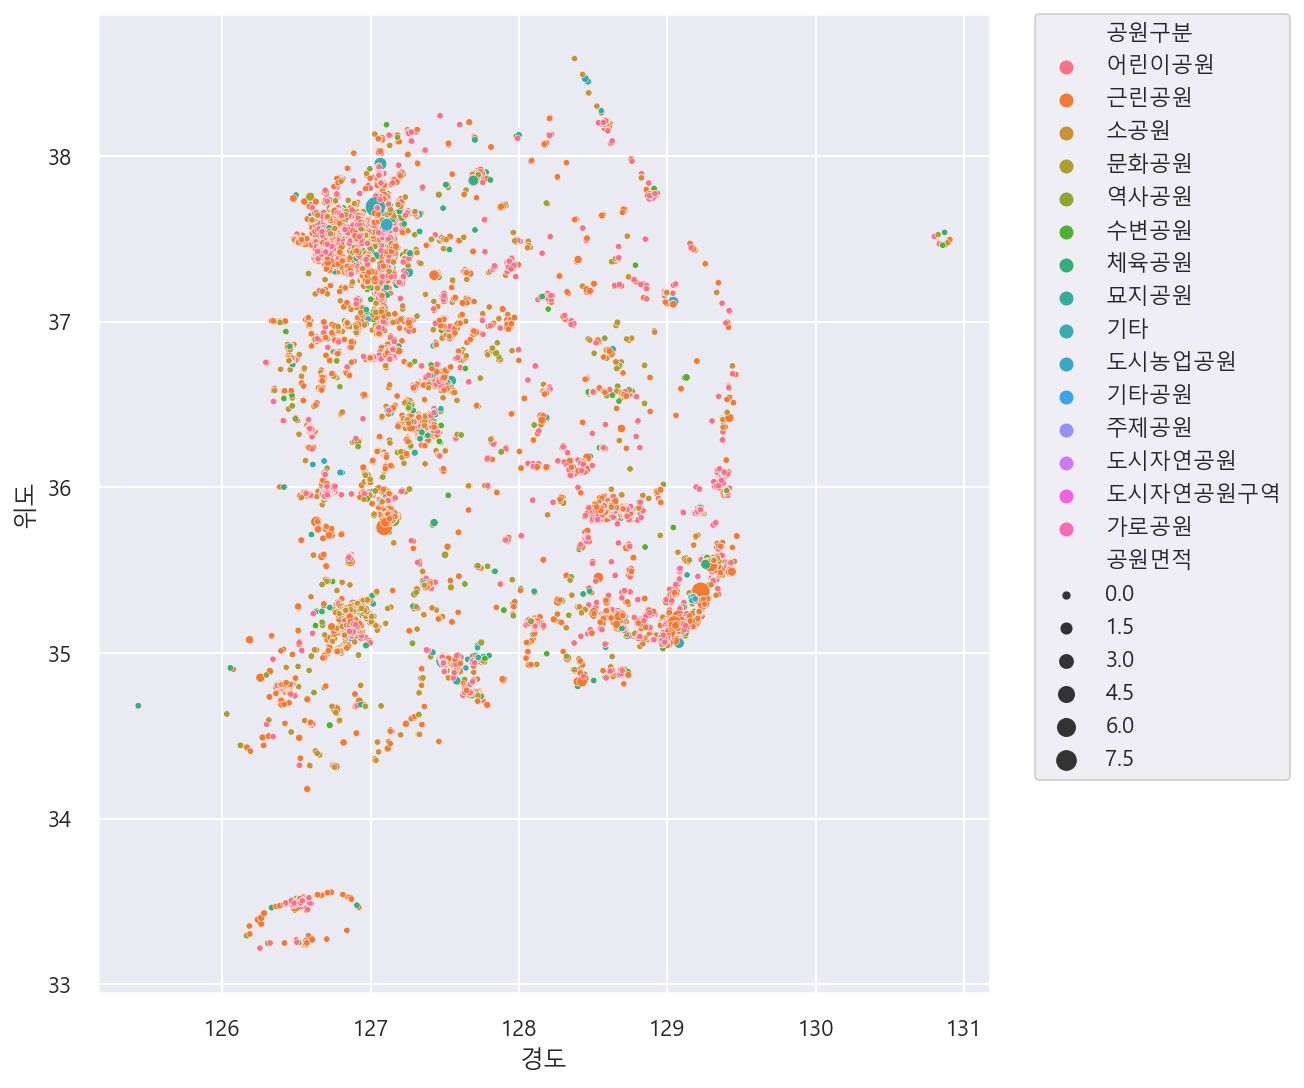

In [87]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.
plt.figure(figsize=(8,9))
sns.scatterplot(data=df_park,x="경도",y="위도",hue="공원구분",size="공원면적",sizes=(10,100))

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) #legend값을 밖으로 해주기 위해서 다음과 같이 한다.

## 시도별 공원분포

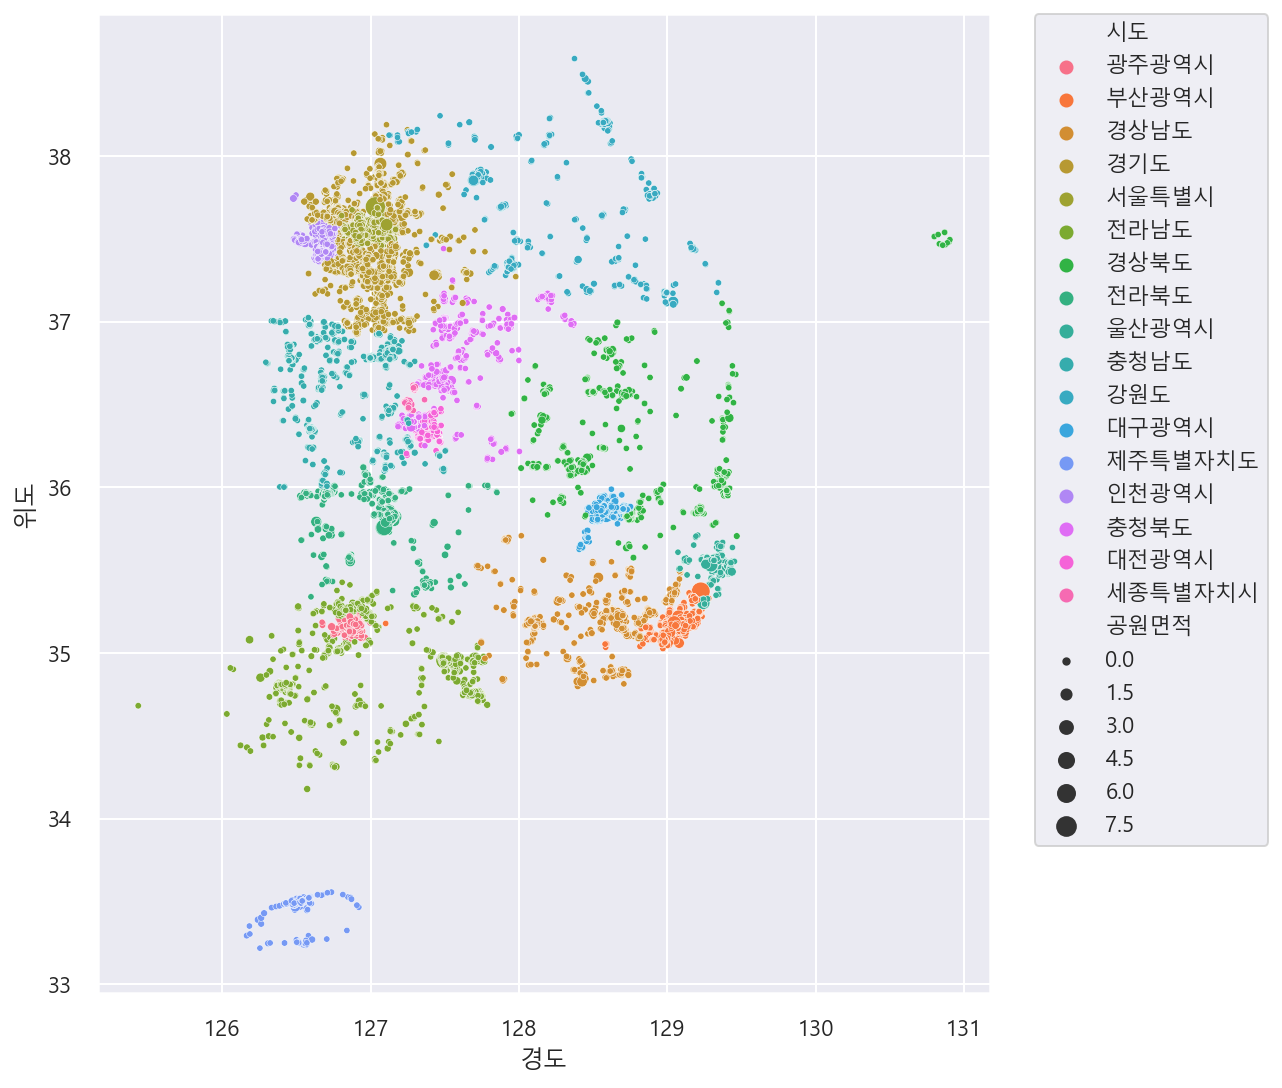

In [88]:
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.
plt.figure(figsize=(8,9))
sns.scatterplot(data=df_park,x="경도",y="위도",hue="시도",size="공원면적",sizes=(10,100))

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) #legend값을 밖으로 해주기 위해서 다음과 같이 한다.

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='count', ylabel='시도'>

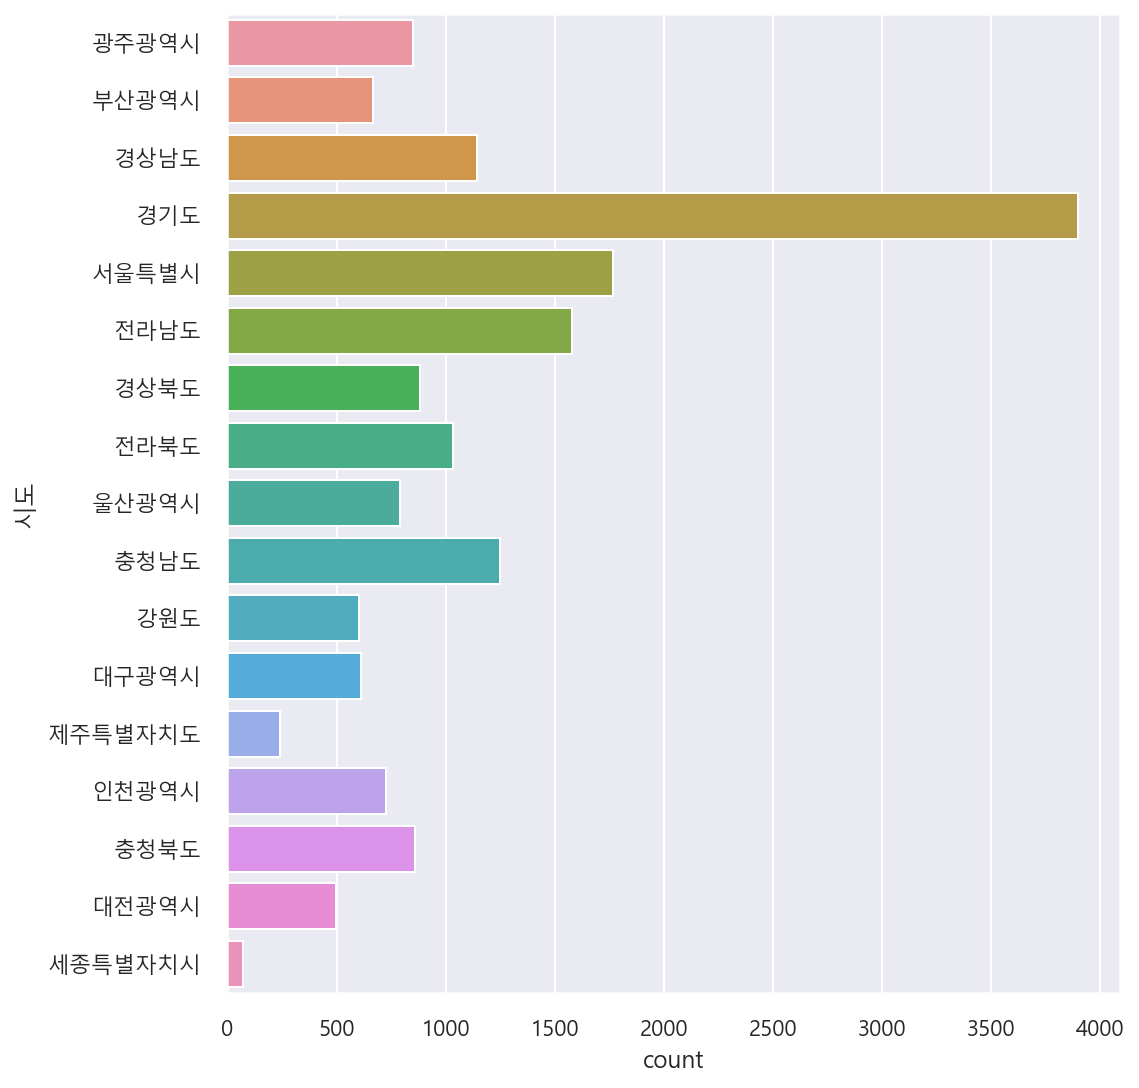

In [89]:
# countplot 으로 시도별 빈도수를 그립니다.

plt.figure(figsize=(8,9))
sns.countplot(data=df_park,y="시도")


## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [90]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.
park_size = pd.pivot_table(df, index="시도", values="공원면적", 
               aggfunc=["count", "mean", "median"])
park_size.style.background_gradient()


,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,652,32078.182975,2032.000000
경기도,3914,26034.894405,2640.050000
경상남도,1163,41276.871842,2226.000000
경상북도,949,27941.744152,2120.000000
광주광역시,856,32029.854533,2331.800000
대구광역시,612,32450.690033,2062.750000
대전광역시,498,36342.096185,2076.500000
부산광역시,670,50673.417955,2157.500000


## 내가 사는 지역의 공원을 지도에 표시해 보기

In [91]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.

df_sn = df[(df["시도"] == "서울특별시") & (df["구군"] == "강서구")]
df_sn.shape

(139, 36)

In [92]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.

df_sn[["시도", "구군", "공원명"]].head()

,시도,구군,공원명
1204,서울특별시,강서구,종달새
1963,서울특별시,강서구,능골
2095,서울특별시,강서구,코끼리
2096,서울특별시,강서구,구름
2097,서울특별시,강서구,볏골


### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [97]:
# str.contains 로 "공원명"에 "염창"이 들어가는 데이터를 찾습니다.

df_sn.loc[df_sn["공원명"].str.contains("염창"), ["공원명", "위도", "경도"]]

,공원명,위도,경도
2327,염창,37.557007,126.869821


###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [95]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요

import folium

m = folium.Map([37.557808, 126.860243], zoom_start=13)


for n in df_sn.index:
    lat = df_sn.loc[n, "위도"]
    long = df_sn.loc[n, "경도"]
    tooltip = df_sn.loc[n, "공원명"] + " " + df_sn.loc[n, "소재지도로명주소"]
    
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)

m.save('index.html')
m